In [1]:
from IPython.display import display
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,20)
import numpy as np
import os
import shutil
import posixpath
from sklearn.preprocessing import StandardScaler
import wfdb

# plot the whole record

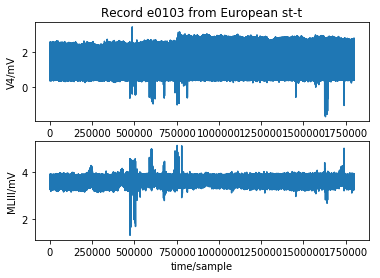

{'record_name': 'e0103',
 'n_sig': 2,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 1800000,
 'base_time': None,
 'base_date': None,
 'comments': ['Age: 62  Sex: M',
  'Mixed angina',
  '1-vessel disease (RCA)',
  'Medications: nitrates, diltiazem',
  'Recorder type: ICR 7200'],
 'sig_name': ['V4', 'MLIII'],
 'p_signal': array([[0.455, 3.755],
        [0.46 , 3.78 ],
        [0.45 , 3.765],
        ...,
        [0.535, 3.91 ],
        [0.54 , 3.87 ],
        [0.53 , 3.865]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['e0103.dat', 'e0103.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [91, 751],
 'checksum': [56457, 48959],
 'block_size': [0, 0]}

In [2]:
record = wfdb.rdrecord('european-st-t-database/e0103') 
wfdb.plot_wfdb(record=record, title='Record e0103 from European st-t') 
display(record.__dict__)

In [3]:
import numpy as np
arr1=np.array(record.p_signal[:])
x, y = arr1.T
np.where(x == max(x))[0][0]
max(x)
x=np.array([y for y in x])
x=x.reshape(-1, 1)

In [4]:
print(x[:250])

[[0.455]
 [0.46 ]
 [0.45 ]
 [0.425]
 [0.435]
 [0.455]
 [0.49 ]
 [0.5  ]
 [0.485]
 [0.5  ]
 [0.495]
 [0.5  ]
 [0.5  ]
 [0.515]
 [0.53 ]
 [0.56 ]
 [0.57 ]
 [0.56 ]
 [0.535]
 [0.535]
 [0.535]
 [0.525]
 [0.51 ]
 [0.5  ]
 [0.5  ]
 [0.49 ]
 [0.485]
 [0.465]
 [0.46 ]
 [0.45 ]
 [0.445]
 [0.44 ]
 [0.435]
 [0.44 ]
 [0.445]
 [0.475]
 [0.495]
 [0.5  ]
 [0.5  ]
 [0.48 ]
 [0.45 ]
 [0.43 ]
 [0.43 ]
 [0.445]
 [0.495]
 [0.63 ]
 [0.88 ]
 [1.29 ]
 [1.77 ]
 [2.19 ]
 [2.415]
 [2.32 ]
 [1.985]
 [1.535]
 [1.085]
 [0.75 ]
 [0.58 ]
 [0.52 ]
 [0.525]
 [0.525]
 [0.515]
 [0.49 ]
 [0.475]
 [0.465]
 [0.45 ]
 [0.455]
 [0.455]
 [0.465]
 [0.48 ]
 [0.475]
 [0.49 ]
 [0.475]
 [0.455]
 [0.46 ]
 [0.465]
 [0.475]
 [0.475]
 [0.46 ]
 [0.485]
 [0.485]
 [0.485]
 [0.485]
 [0.495]
 [0.495]
 [0.495]
 [0.495]
 [0.495]
 [0.49 ]
 [0.485]
 [0.5  ]
 [0.515]
 [0.53 ]
 [0.515]
 [0.54 ]
 [0.555]
 [0.57 ]
 [0.58 ]
 [0.595]
 [0.575]
 [0.585]
 [0.6  ]
 [0.62 ]
 [0.65 ]
 [0.665]
 [0.695]
 [0.71 ]
 [0.725]
 [0.73 ]
 [0.73 ]
 [0.75 ]
 [0.76 ]
 

# Slice and work on the first 250 points

In [5]:
x=x[:250]

# Plot the points

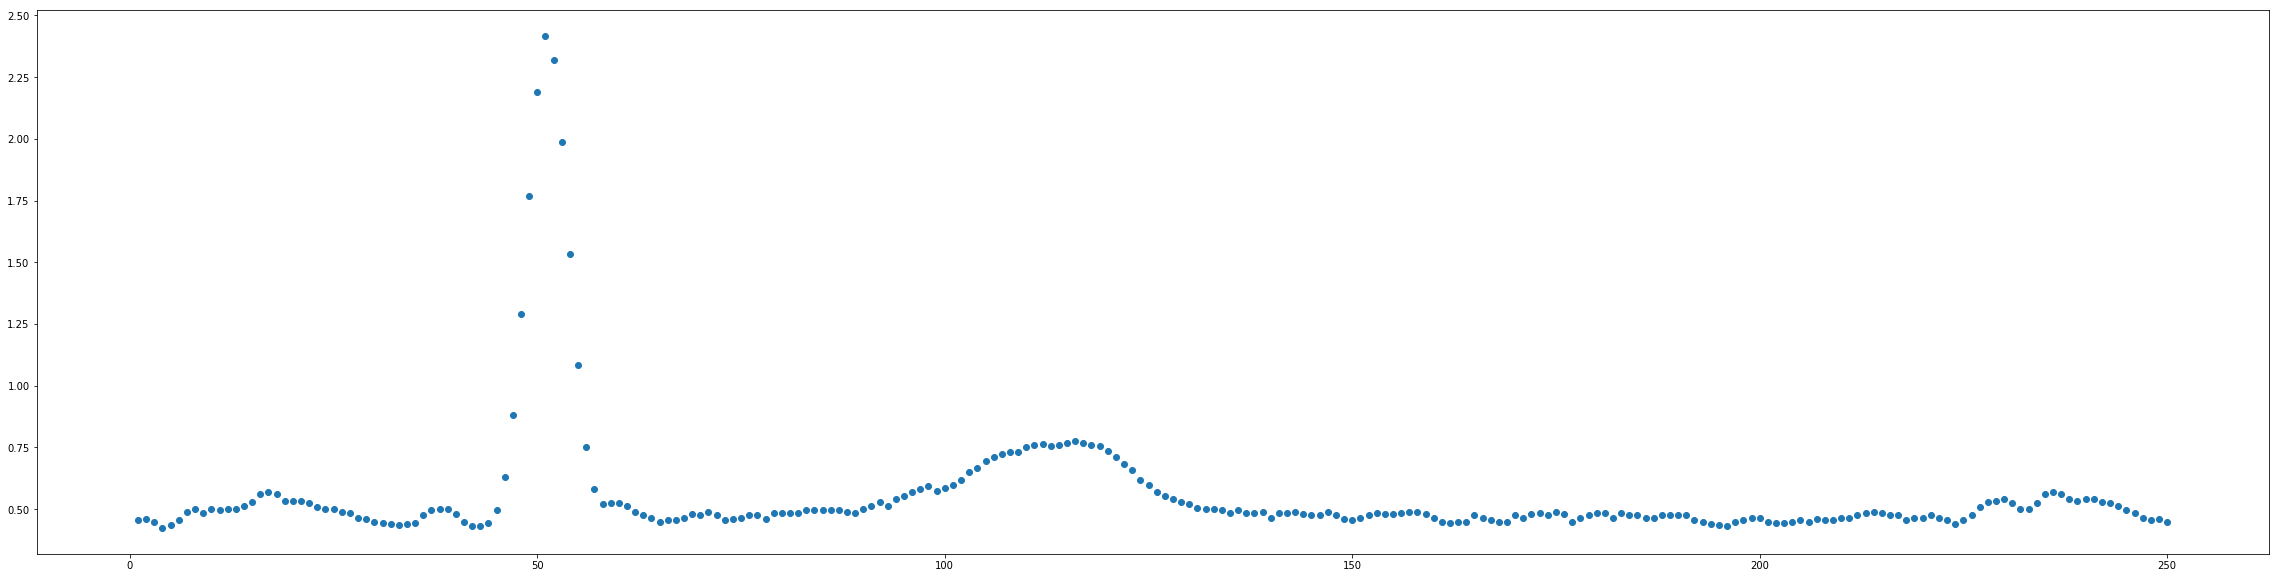

In [6]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (40,10)

ts=np.array([x+1 for x in range(250)])
plt.scatter(ts,x)
plt.show()

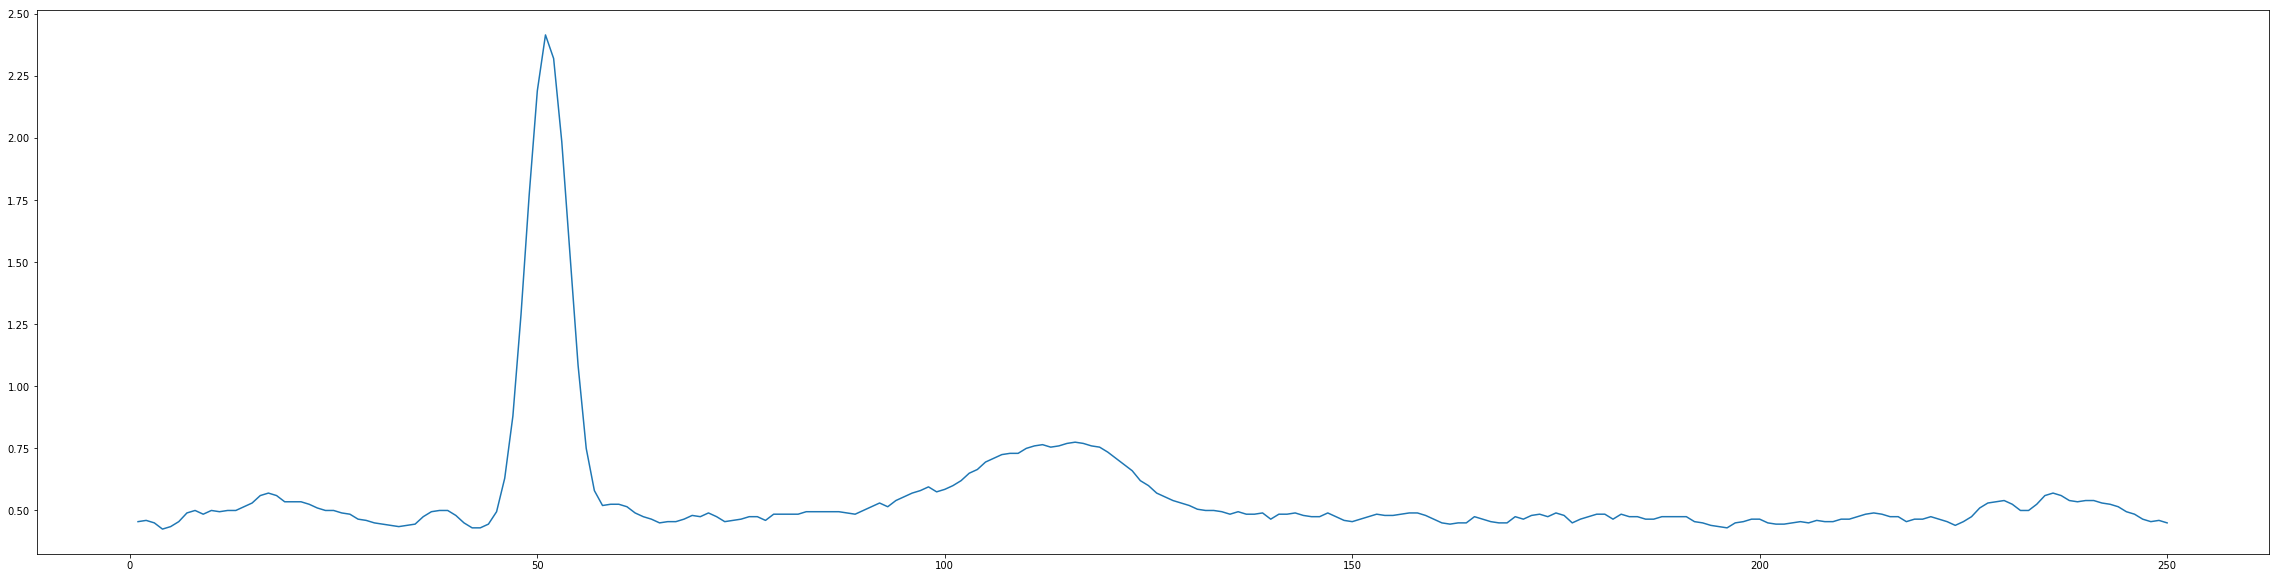

In [9]:
ts=np.array([x+1 for x in range(250)])
plt.plot(ts,x)
plt.show()

# find the QRS points

In [7]:
import math
r_point_y=max(x)
point=np.where(x == max(x))[0][0]
r_point_x=ts[point]
# next we find the slope made by the line connecting to the s point
for j in range(point,150):
    if x[j]<x[j+1]:
        break
for k in range(point,0,-1):
    if x[k-1]>x[k]:
        break
q_point_y=x[k]
q_point_x=ts[k]
s_point_y=x[j]
s_point_x=ts[j]

# plot the QRS points and mark the area

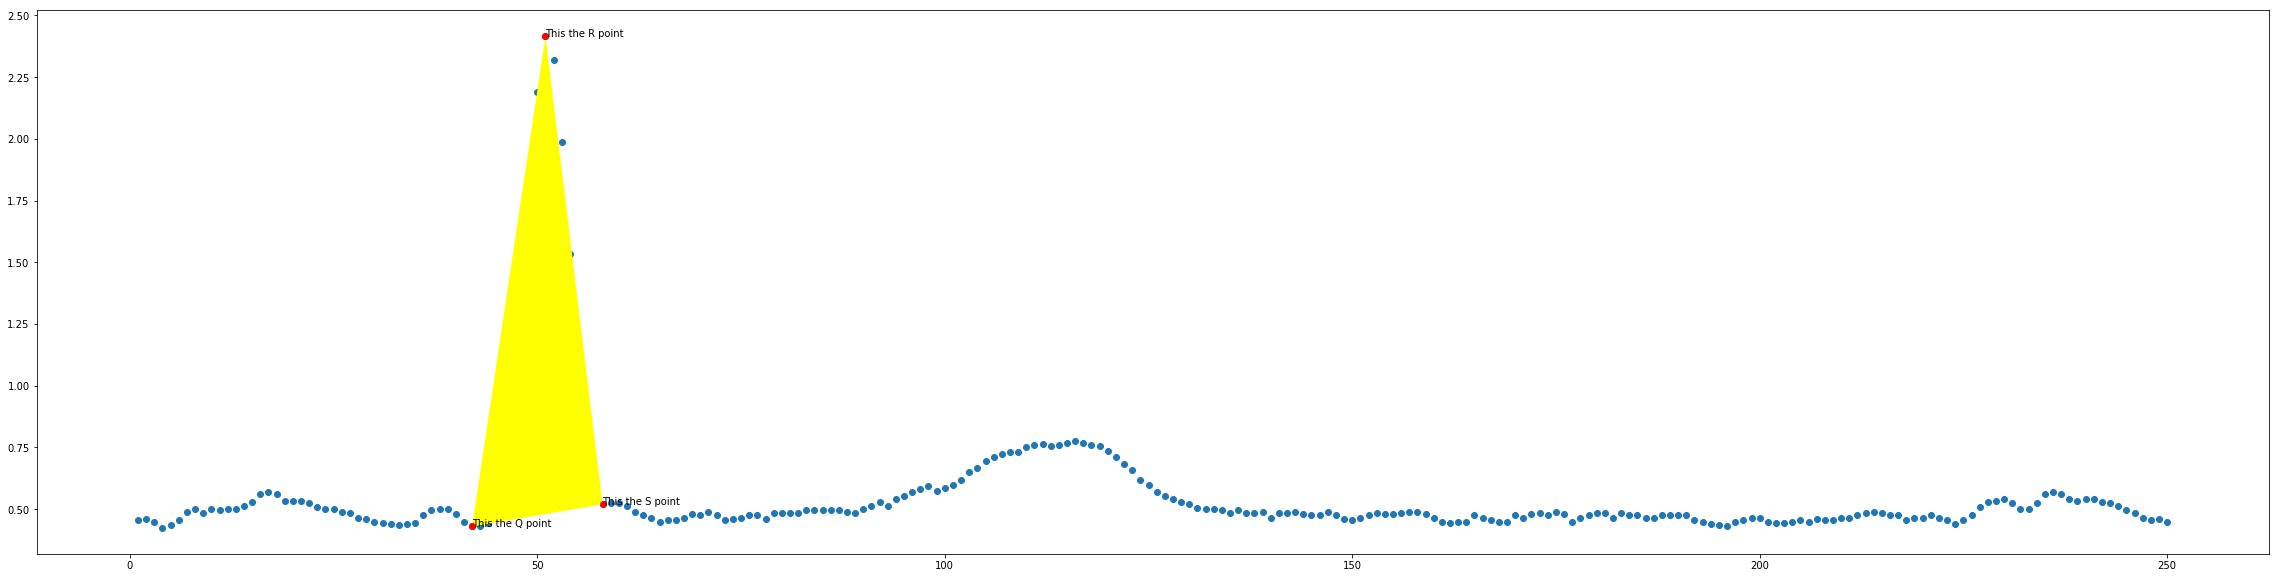

In [8]:
from matplotlib.patches import Polygon
ts=np.array([x+1 for x in range(250)])
plt.scatter(ts,x)

plt.plot(r_point_x,r_point_y, '-o',color="red")
plt.text(r_point_x,r_point_y,'This the R point')
plt.plot(q_point_x,q_point_y, '-o',color="red")
plt.text(q_point_x,q_point_y,'This the Q point')
plt.plot(s_point_x,s_point_y, '-o',color="red")
plt.text(s_point_x,s_point_y,'This the S point')
pts = np.array([[q_point_x,q_point_y], [r_point_x,r_point_y], [s_point_x,s_point_y]])
p = Polygon(pts, closed=False, fill=True, facecolor="yellow")

ax = plt.gca()
ax.add_patch(p)
#ax.set_xlim(1,7)
#ax.set_ylim(1,8)
plt.show()

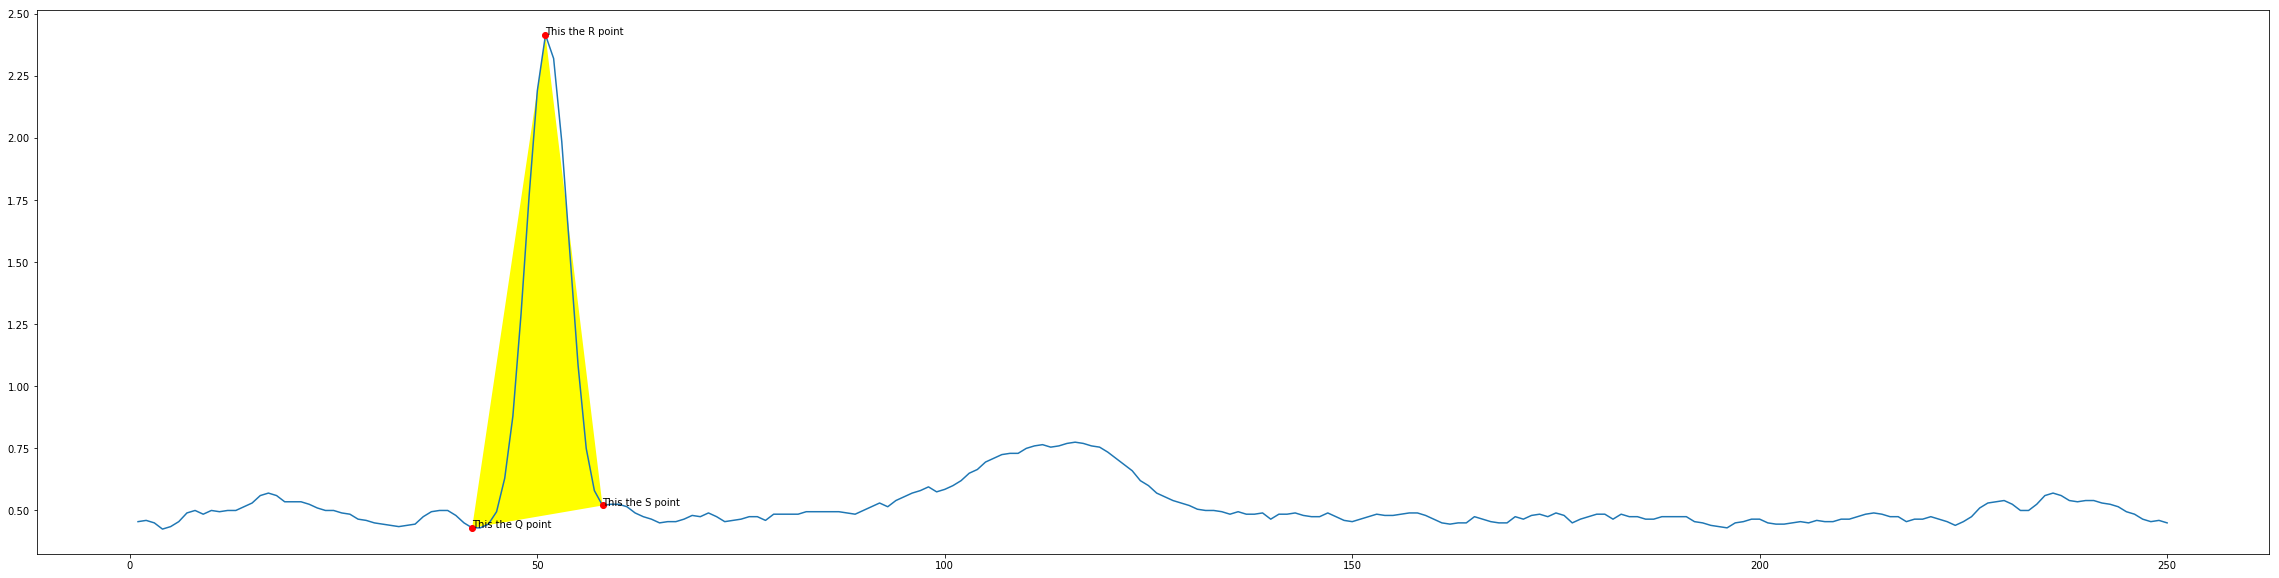

In [10]:
ts=np.array([x+1 for x in range(250)])
plt.plot(ts,x)

plt.plot(r_point_x,r_point_y, '-o',color="red")
plt.text(r_point_x,r_point_y,'This the R point')
plt.plot(q_point_x,q_point_y, '-o',color="red")
plt.text(q_point_x,q_point_y,'This the Q point')
plt.plot(s_point_x,s_point_y, '-o',color="red")
plt.text(s_point_x,s_point_y,'This the S point')
pts = np.array([[q_point_x,q_point_y], [r_point_x,r_point_y], [s_point_x,s_point_y]])
p = Polygon(pts, closed=False, fill=True, facecolor="yellow")

ax = plt.gca()
ax.add_patch(p)
#ax.set_xlim(1,7)
#ax.set_ylim(1,8)
plt.show()